# $\rho'$ analysis notes

## GIRD Selection criteria:

These criteria were applied on the selection stage(GRID):

Events:

- >= 4 tracks
    
Tracks:

- Has Point On inner OR outer ITS Layer
- Not ITS SA
- |dca1| < 3 && |dca0| < 3;

### Data info

In [1]:
from modules.FourTrackEvents import *

ccup9_2015_file = r'D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\4Prongs2015oLast.root'
ccup9_2015_local_test = r'D:\GoogleDrive\Job\cern\Alice\analysis\dev\grid\selection\RhoPrime\macro\AnalysisResults.root'

# dfs.loc[0] # get dataframe part with entry = 0

ft = FourTrackEvents()

print('Events attributes:')
print(ft.orig_events.columns.tolist())
print('Track attributes:')
print(ft.orig_tracks.columns.tolist())
print()
print('Events count:', "{:,}".format(len(ft.orig_events.index)))
print('Tracks count:', "{:,}".format(len(ft.orig_tracks.index)))

Events attributes:
['RunNum', 'PeriodNumber', 'OrbitNumber', 'BunchCrossNumber', 'Mass', 'Pt', 'Q', 'Rapidity', 'Phi', 'ZNAenergy', 'ZNCenergy', 'ZPAenergy', 'ZPCenergy', 'VtxX', 'VtxY', 'VtxZ', 'VtxContrib', 'VtxChi2', 'VtxNDF', 'SpdVtxX', 'SpdVtxY', 'SpdVtxZ', 'SpdVtxContrib', 'V0Adecision', 'V0Cdecision', 'ADAdecision', 'ADCdecision', 'V0Afired', 'V0Cfired', 'ADAfired', 'ADCfired', 'STPfired', 'SMBfired', 'SM2fired', 'SH1fired', 'OM2fired', 'OMUfired', 'IsTriggered', 'nTracklets', 'nTracks', 'FORChip']
Track attributes:
['T_NumberOfSigmaTPCPion', 'T_Eta', 'T_Phi', 'T_Px', 'T_Py', 'T_Pz', 'T_Q', 'T_HasPointOnITSLayer0', 'T_HasPointOnITSLayer1', 'T_ITSModuleInner', 'T_ITSModuleOuter', 'T_TPCNCls', 'T_TPCRefit']

Events count: 106,705
Tracks count: 25,117,847


## Analysis criteria

Let's take from input date only events with 4 tracks and zero total charge.
Also prepare mask for tracks that satisfy standatd criteria contains further conditions for the TPC:

* |NumberOfSigmaTPCPion| < 3
* Number of TPC Clusters > 50
* TPCRefit
## Low energy tracks and TPC

There is an idea about that tracks with small energies (low pt) not able to reach TPC.
We can try to estimate influence of TPC criteria to the statistics.

Let's see what happend in case of we will plot pt for any combination of TPC tracks:

### Event with std criteria

|detector|track1|track2|track3|track4|
|:--:|:--:|:--:|:--:|:--:|
|ITS|+|+|+|+|
|TPC|+|+|+|+|

### Let's start to take also such combinations to the sample:

|detector|track1|track2|track3|track4|
|:--:|:--:|:--:|:--:|:--:|
|ITS|+|+|+|+|
|TPC|+|+|+|-|

|detector|track1|track2|track3|track4|
|:--:|:--:|:--:|:--:|:--:|
|ITS|+|+|+|+|
|TPC|+|+|-|-|

|detector|track1|track2|track3|track4|
|:--:|:--:|:--:|:--:|:--:|
|ITS|+|+|+|+|
|TPC|+|-|-|-|

|detector|track1|track2|track3|track4|
|:--:|:--:|:--:|:--:|:--:|
|ITS|+|+|+|+|
|TPC|-|-|-|-|

We can see statistics gain ration equal 2.5 between std criteria and total combinations:


In [2]:
from modules.physics import kinematics

ft_zq_Pt_nTpc = []
ft_zq_Mass_nTpc = []

# TODO: fill this in parallel!
# NOTE: I'm not sure that I can because of memory will be overtaken
for i in range(5):
    ft_zq_Pt_nTpc.append(kinematics.pt_events(ft.GetTracksWithNTPC(ft.four_tracks_zq,i)))
    ft_zq_Mass_nTpc.append(kinematics.mass_events(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq,i))))

## Transversal momentum distribution

In [5]:
from modules.physics import kinematics
from modules.physics.analysis.ITSvsTPC_events import *
from matplotlib.patches import Rectangle 
import matplotlib.pyplot as plt

%matplotlib widget

colors = ['red', 'green', 'yellow', 'orange', 'black']
labels = ['ITS & (>= 0TPC)', 'ITS & (>= 1TPC)',
          'ITS & (>= 2TPC)', 'ITS & (>= 3TPC)', 'ITS & ( =  4TPC)']

_=ShowComparisonSame('', ft_zq_Pt_nTpc, r'$p_t \pi^+\pi^-\pi^+\pi^-$,GeV',
                   labels, colors, nBins=100, ranges=(0, 2),showPatch=True)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

As we can see here pt for $Q \neq 0$ contains only background events:

In [6]:
from matplotlib.patches import Rectangle 
from modules.physics import kinematics
import matplotlib.pyplot as plt

%matplotlib widget

plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

fig.suptitle(f'$p_t$ of events', fontsize=22)
b = 100
r = 0,2
counts,bin_edges = np.histogram(ft_zq_Pt_nTpc[3], bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', label=r'$Q=0$', color=colors[0])

val=(r[1]-r[0])*1000 // b
ax.set_xlabel('$p_t, GeV$')
ax.set_ylabel(f'#events / {val}MeV')
ax.add_patch(Rectangle((0, 0.15), 0.15, 900, fc='lightgrey', alpha=0.4))
ax.text(0.15,0,"0.15", size=20)
counts,bin_edges = np.histogram(kinematics.pt_events(ft.GetTracksWithNTPC(ft.four_tracks_nzq)), bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', label=r'$Q\neq0$', color=colors[2])
ax.legend()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Now  let's try to see what tracks we lost from signal area and what contribution they have:

TPC and ITS has different coverage for polar angle:

![img1](https://camo.githubusercontent.com/9a7ab40d0f74a866a7095986644134a0f72cc58b/68747470733a2f2f70702e757365726170692e636f6d2f633835323231362f763835323231363738332f3131396137332f304f76685f6c544b4e7a552e6a7067)

Perhaps we have tracks that not only can't reach TPC, but also has $\theta$ values that TPC doesn't cover.

Below we can see polar angle distribution for tracks that covers three cases:

1. All tracks from events were reconstructed by ITS and TPC
2. Only ITS tracks from events with only part TPC tracks. Here tracks that not reconstructed by TPC
3. All tracks from events were reconstructed by ITS or TPC

We can see small gaps with for the second case, that allow to speak about correctness of the suggestion, but anyway low energy of tracks is the main reason why TPC can't reconstructed tracks.  

In [18]:
ShowComparison('$\\theta$',[AllTPCTracksTheta, ITSDiffTPCTracksTheta, TotalLowPtTheta], '$^\\circ$', ['ITS&&TPC', 'OnlyITSFromNTPCEvents', 'ITS||TPC'], None, nBins=80, ranges=(25,150))

NameError: name 'ShowComparison' is not defined

## Mass
Let's see on the mass distribution of the events


In [8]:
from modules.physics import kinematics
from modules.physics.analysis.ITSvsTPC_events import *

%matplotlib widget

colors = ['red', 'orange', 'black']
labels = ['ITS & (>= 2TPC)', 'ITS & (>= 3TPC)', 'ITS & ( =  4TPC)']


_ = ShowComparisonSame('4track events Mass', ft_zq_Mass_nTpc[2:], '$Mass, GeV$',
                   labels, colors, nBins=100, ranges=(0.5, 3.5))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
from modules.physics import kinematics

%matplotlib widget

plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

fig.suptitle(f'Масса $\pi^+\pi^-\pi^+\pi^-$', fontsize=32)
b = 100
r = 0.5,3.5

# counts,bin_edges = np.histogram(ft_zq_Mass_nTpc[1], bins=b, range=r)
# bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
# errs = np.sqrt(counts)
# ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', label='Q = 0', color=colors[0])

# val=(r[1]-r[0])*1000 // b
# ax.set_xlabel('$Mass, GeV$')
# ax.set_ylabel(f'#events / {val}MeV')

counts,bin_edges = np.histogram(kinematics.mass_events(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_nzq))), bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', color=colors[1], label=r"$Q\neq0$")

val=(r[1]-r[0])*1000 // b
ax.set_xlabel('$Mass, GeV$')
ax.set_ylabel(f'#events / {val}MeV')
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [132]:
from modules.physics import kinematics

%matplotlib widget

plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

fig.suptitle(f'4 tracks mass', fontsize=32)
b = 100
r = 0.5,3.5

counts,bin_edges = np.histogram(kinematics.mass_events(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq)).loc[ triggered_events]), bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', color=colors[0], label=r"triggering")

counts,bin_edges = np.histogram(kinematics.mass_events(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq)).loc[ untriggered_events]), bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', color=colors[1], label=r"false triggering")

val=(r[1]-r[0])*1000 // b
ax.set_xlabel('$Mass, GeV$')
ax.set_ylabel(f'#events / {val}MeV')
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [134]:
untriggered_events

Int64Index([     4,     42,     48,     83,     96,    106,    118,    167,
               173,    179,
            ...
            106615, 106622, 106625, 106631, 106643, 106647, 106651, 106654,
            106681, 106691],
           dtype='int64', name='entry', length=8631)

+### Pions subsystems

In our process 4 pions were producted. The most probably intermediate state including two pions and $\rho$ i.e.
$$\rho' \rightarrow \rho \ \pi^+ \pi^- \rightarrow \pi^+ \pi^- \pi^+ \pi^-$$ 

We can see this on distribution of mass that can be obtained as all combinations of pairs from intial four tracks, i.e. only four pairs:

![img](https://camo.githubusercontent.com/53a52e2a6d4ae7112d74f4073c979a51166170d8/68747470733a2f2f70702e757365726170692e636f6d2f633835333632342f763835333632343436372f34383466332f5431375a754b597062526f2e6a7067)

Here we can plot two distirbutions:

1. Make all possible(4) combinations of pairs. Then take lightest and pair that belong to one combination with that. Plot masses of these two pairs.
2. Plot masses of masses from possible combinations.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


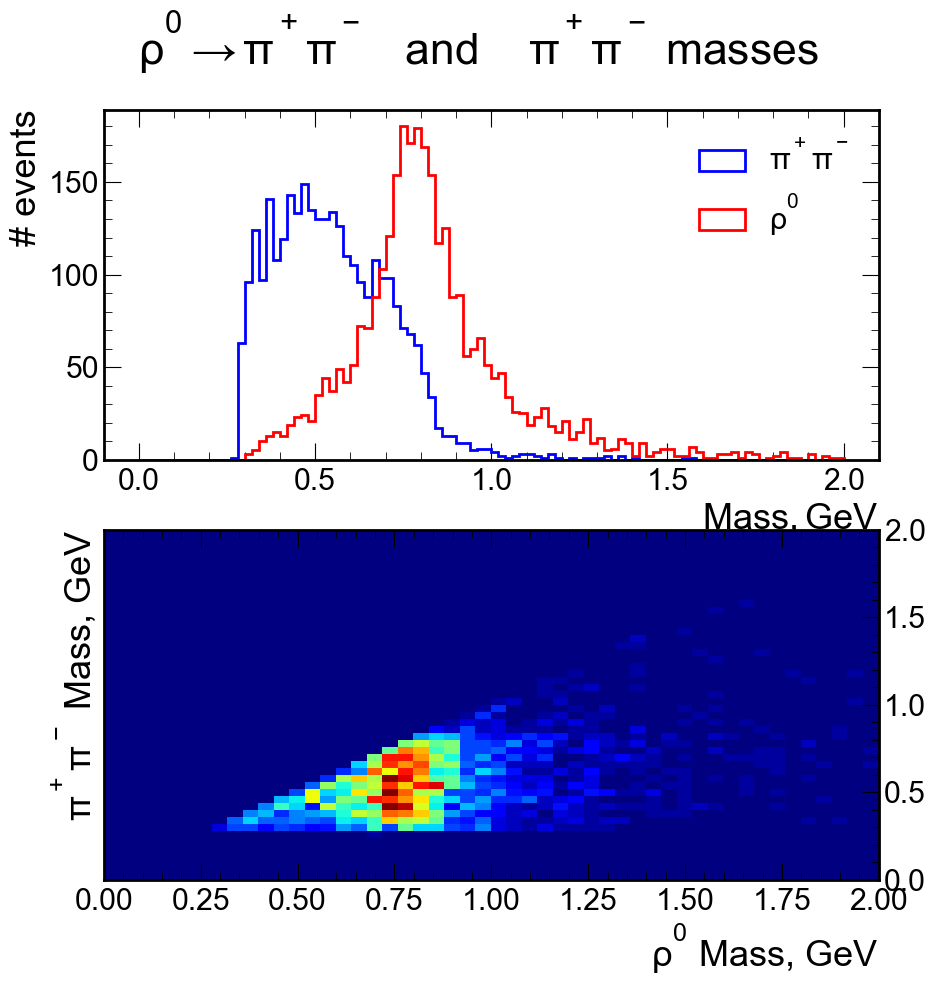

In [17]:
from modules.physics.analysis import pairs

# %matplotlib widget
#ShowMassComaprison(LiteHeavyRecoil, 'Lightest and Recoil Pairs')
LiteHeavyRecoil, LiteHeavyTotal = pairs.GetPairs(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq,4)))

fig = pairs.ShowMassComaprison(LiteHeavyTotal, r'$\rho^0 \rightarrow \pi^+\pi^-$   and    $\pi^+\pi^-$ masses')
fig

As we can see above, for second case (all possible pairs) we've got stronger signal in comparison with light-recoil pair as it made in [STAR work](http://arxiv.org/abs/0912.0604v2). Let's build 2d distirbuition and marginals component separately:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


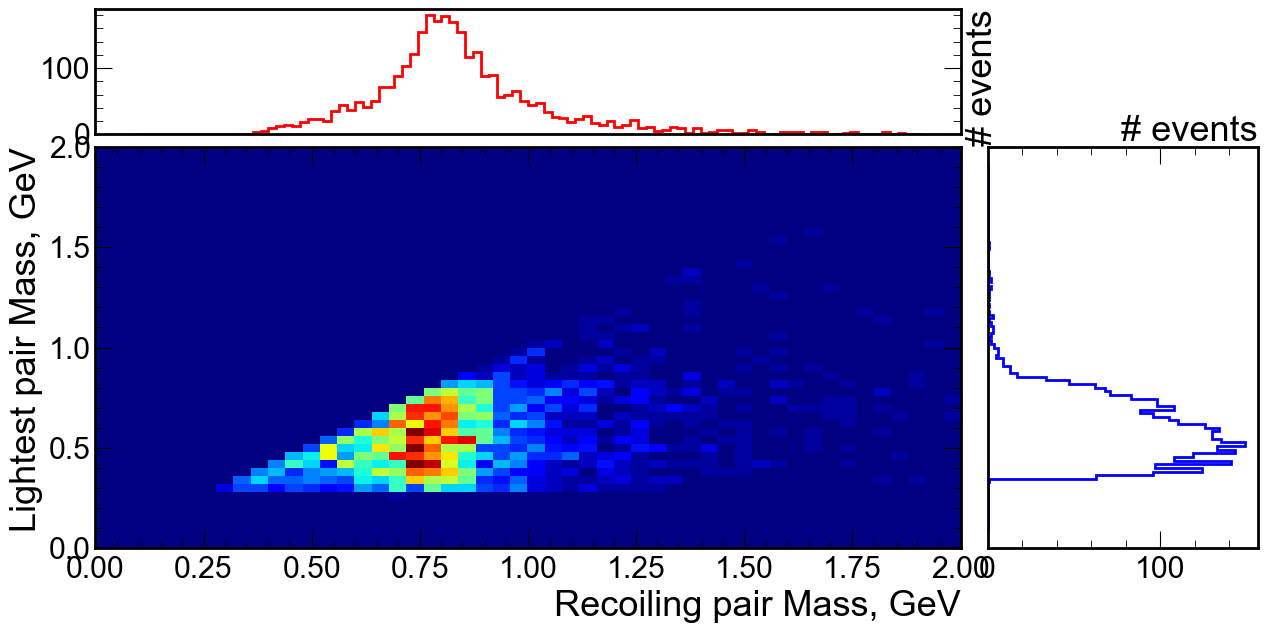

In [12]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

plt.style.use(hep.style.ROOT)

fig = plt.figure(figsize=(15, 7))

gs = GridSpec(4,4,wspace=0.1,hspace=0.1)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.hist2d(LiteHeavyTotal.Recoil, LiteHeavyTotal.Lite, bins=(50, 50), range=[(0, 2), (0, 2)], cmap=plt.cm.jet)
_ = ax_marg_y.hist(LiteHeavyTotal.Lite, bins=100, range=(0, 2), histtype='step', color='blue', linewidth=2, label='lite pair',orientation="horizontal")
_ = ax_marg_x.hist(LiteHeavyTotal.Recoil, bins=100, range=(0, 2), histtype='step', color='red', linewidth=2, label='rest pair')


ax_joint.set_ylabel('Lightest pair Mass, GeV')
ax_joint.set_xlabel('Recoiling pair Mass, GeV')

# ax_marg_y.set_xlabel('$Mass, GeV$')
ax_marg_y.set_xlabel('# events')
ax_marg_x.yaxis.set_label_position("right")
ax_marg_x.xaxis.set_ticks([])
ax_marg_x.xaxis.set_ticks_position('none')
ax_marg_y.yaxis.set_ticks_position('none')
ax_marg_y.yaxis.set_ticks([])

# ax_marg_x.set_xlabel('$Mass, GeV$')
ax_marg_x.set_ylabel('# events')
ax_marg_y.xaxis.set_label_position("top")
ax_marg_x
ax_joint.legend()
fig

In [47]:
%matplotlib widget


plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

counts1, bins1  = np.histogram(LiteHeavyRecoil.Recoil, bins=100, range=(0,2))
counts2, bins2  = np.histogram(LiteHeavyTotal.Recoil, bins=100, range=(0,2))

_ = ax.hist(counts1/counts2,bins=bins1, histtype='step', color='black', linewidth=2)


plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

counts1, bins1  = np.histogram(LiteHeavyRecoil.Lite, bins=100, range=(0,2))
counts2, bins2  = np.histogram(LiteHeavyTotal.Lite, bins=100, range=(0,2))

_ = ax.hist(counts1/counts2,bins=bins1, histtype='step', color='black', linewidth=2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-47-3182a64b8363>:11: RuntimeWarning: invalid value encountered in true_divide
  _ = ax.hist(counts1/counts2,bins=bins1, histtype='step', color='black', linewidth=2)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-47-3182a64b8363>:21: RuntimeWarning: invalid value encountered in true_divide
  _ = ax.hist(counts1/counts2,bins=bins1, histtype='step', color='black', linewidth=2)


## Cross section

Let's see to cross section of my events.

For this we should take luminosity of runs.

> Unfortunately file that I have to use for getting luminosity have a reference to special class AliTriggerInfo and moreover it packed into TObjArray, so I can't read it via uproot4. This is the reason why I used pure root again. [Here is the script](https://github.com/bdrum/cern-physics/blob/master/root-cpp/RhoPrime/macro/lumi.C) that I used.

Then let's see how much events do we have in each run.

$$L = \sigma \frac{\delta N}{\delta t}$$, this means that 

$$\sigma \approx \frac{N}{L}$$

Cross section of phenomena should be flat and independent from runs. 

Let's check it:

In [23]:
from modules.physics.analysis.crossection import GetCrossSection

df_cs = GetCrossSection(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq)))
df_cs['sigma'] = df_cs.nEvFT / (df_cs.Lumi * 1000)
df_cs.sigma.describe()


ImportError: cannot import name 'events' from 'modules' (d:\GoogleDrive\Job\cern\Alice\analysis\dev\physics\notebooks\modules\__init__.py)

In [53]:
import scipy.stats

fig = plt.figure(figsize=(25, 7))
# fig.suptitle("visible cross section")
ax = fig.add_subplot()
bins = list(df_cs.run)
cnts = list(df_cs.sigma)
errs = np.sqrt(df_cs.nEvFT)/(df_cs.Lumi * 1000)
x = np.arange(len(bins))
width = 0.15
ax.errorbar(x - width/2, cnts, yerr=errs, fmt='o', label=r'$\sigma \approx \frac{N_{(\pi^+\pi^-\pi^+\pi^-)_{ev}}}{L}$')
ax.set_xticks(x)
ax.set_xticklabels(bins, rotation=90, rotation_mode="anchor", ha="right", fontsize=12)
ax.set_ylabel(r'$\sigma$',fontsize=14)
ax.set_ylim(0,10)

chi2,p = scipy.stats.chisquare(cnts, np.tile(np.average(cnts),len(cnts)))
ax.text(108,8,r"$\frac{Chi^2}{NDf} = \frac{189.388}{118}$", size=20)
ax.text(108,7,r"$p0 = 4.4542 \pm 0.11613$", size=16)
ax.legend(prop={'size': 15})
ax.axhline(y=np.average(cnts), color='r', linestyle='-')
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Other decays

In PDG I've seen also other interesting modes for $\rho'$:

- 1. $\rho' \rightarrow \eta_0 \rho_0$ | ?
   - 1.1. $\rho_0 \rightarrow 4 \pi$ | $2*10^{-5}\%$
   - 1.2. $\rho_0 \rightarrow \pi^+ \pi^-$ | $10^{-2}\%$
   - 1.3. $\eta_0' \rightarrow  \pi^+ \pi^- \gamma$ | $4\%$
   - 1.4. $\eta_0' \rightarrow  \pi^+ \pi^- \pi^0$ | $23\%$
- 2. $\rho' \rightarrow 4 \pi$ | ?

What about $\rho' \rightarrow \rho_0 \rho_0$ is it possible?

## False triggering

There are some situations when CUP9 triggering could be false.

![img](https://sun9-58.userapi.com/impf/x7UtIW5ElLKpDl4ASPuz0FXhNjwnxYcAy0BuHw/wJZr1On9l4o.jpg?size=1280x718&quality=96&sign=1ed3d5f08fcdefd89ab4e02a5041c6d0&type=album)



In [127]:
df

,vPhiInner,vPhiOuter,triggered
entry,,,
4,"[True, False, False, False, False, False, Fals...","[True, True, False, False, False, False, False...",False
8,"[False, False, True, False, False, False, Fals...","[False, False, False, False, False, True, Fals...",True
15,"[True, False, False, False, False, False, Fals...","[True, False, False, False, False, False, Fals...",True
20,"[True, False, False, False, False, False, Fals...","[False, True, False, False, False, False, Fals...",True
22,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",True
...,...,...,...
106658,"[False, False, False, False, False, False, Tru...","[False, False, False, False, False, False, Fal...",True
106674,"[False, True, False, False, False, False, True...","[False, False, False, True, False, False, Fals...",True
106681,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",False


In [126]:
from tqdm import tqdm
import pandas as pd

# let's form fired FORs numbers for 4 tracks zq EVENT 
for_sensors = pd.DataFrame(ft.orig_events.FORChip.loc[ft.four_tracks_zq.reset_index().entry])
for_sensors['subentry']=for_sensors.groupby(level=0).cumcount()
for_sensors.index.name = 'entry'
for_sensors.set_index('subentry', append=True,inplace=True)

# form arrays of numbers of sensor that linked with TRACKS 
df = ft.four_tracks_zq[['T_ITSModuleInner','T_ITSModuleOuter']] // 1000000

# combine into one dataframe
df['T_ITSSensorNum'] = for_sensors
df = df.reset_index()

# check that sensor linked with track will provide trigger (match with FOR sensor)
df["Inner_matched"] = (abs(abs(df.T_ITSModuleInner*5 - df.T_ITSSensorNum) - 2).apply(lambda x: x <= 2)) * df.T_ITSSensorNum.apply(lambda x: x < 400)

df["Outer_matched"] = (abs(abs(df.T_ITSModuleOuter*5 - df.T_ITSSensorNum) - 2).apply(lambda x: x <= 2)) * df.T_ITSSensorNum.apply(lambda x: x >= 400)
df["vPhiInner"] = np.nan
df.vPhiInner = df.vPhiInner.astype('object')
df["vPhiOuter"] = np.nan
df.vPhiOuter = df.vPhiOuter.astype('object')

df["vPhiInnerValue"] = np.nan
df.vPhiInnerValue = df.vPhiInnerValue.astype('object')
df["vPhiOuterValue"] = np.nan
df.vPhiOuterValue = df.vPhiOuterValue.astype('object')

for i in tqdm(range(len(df))):
    vPhiInner1 = np.zeros(20, dtype=np.bool)
    vPhiOuter1 = np.zeros(40, dtype=np.bool)

    vPhiInnerValues = pd.unique(df.T_ITSSensorNum[i][df.Inner_matched[i]]//20)
    vPhiOuterValues = pd.unique((df.T_ITSSensorNum[i][df.Outer_matched[i]]-400)//20)

    vPhiInner1[vPhiInnerValues]=True
    df.vPhiInner[i] = vPhiInner1

    vPhiOuter1[vPhiOuterValues]=True
    df.vPhiOuter[i] = vPhiOuter1

    df.vPhiInnerValue[i] = vPhiInnerValues
    df.vPhiOuterValue[i] = vPhiOuterValues

df_dbg = df.copy()

# take only matched tracks and fill vPhi arrays for inner and outer
df = df[(df.Inner_matched.apply(any) + df.Outer_matched.apply(any))][['entry', 'vPhiInner', 'vPhiOuter']].groupby('entry').sum()

df["triggered"] = False

# check incorrect topology 

for t in tqdm(df.index):
    for i in range(10):
        for j in range(2):
            k = 2*i+j
            if  (df.vPhiOuter[t][k]    or df.vPhiOuter[t][k+1]        or df.vPhiOuter[t][k+2]) \
		    and (df.vPhiOuter[t][k+20] or df.vPhiOuter[t][(k+21)%40]  or df.vPhiOuter[t][(k+22)%40]) \
		    and (df.vPhiInner[t][i]    or df.vPhiInner[t][i+1]) \
		    and (df.vPhiInner[t][i+10] or df.vPhiInner[t][(i+11)%20]):
                df.at[t,'triggered'] = True

triggered_events = df.index[df.triggered]
untriggered_events = df.index[~df.triggered]

  0%|          | 0/76776 [00:00<?, ?it/s]<ipython-input-126-38b41570587b>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vPhiInner1 = np.zeros(20, dtype=np.bool)
<ipython-input-126-38b41570587b>:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vPhiOuter1 = np.zeros(40, dtype=np.bool)
<ipython-input-126-38b41570587b>:39: SettingWithCopyWarning: 

In [135]:
for t in list(range(76,77)):
    for i in range(10):
        for j in range(2):
            k = 2*i+j
            print (j,k)
            print("Inner barrel:")
            print(df.vPhiInner[t][i],    df.vPhiInner[t][i+1])
            print(df.vPhiInner[t][i+10], df.vPhiInner[t][(i+11)%20])
            print()
            print("Outer barrel:")
            print(df.vPhiOuter[t][k],    df.vPhiOuter[t][k+1],       df.vPhiOuter[t][k+2])
            print(df.vPhiOuter[t][k+20], df.vPhiOuter[t][(k+21)%40], df.vPhiOuter[t][(k+22)%40])
            if  (df.vPhiOuter[t][k]    or df.vPhiOuter[t][k+1]        or df.vPhiOuter[t][k+2]) \
		    and (df.vPhiOuter[t][k+20] or df.vPhiOuter[t][(k+21)%40]  or df.vPhiOuter[t][(k+22)%40]) \
		    and (df.vPhiInner[t][i]    or df.vPhiInner[t][i+1]) \
		    and (df.vPhiInner[t][i+10] or df.vPhiInner[t][(i+11)%20]):
                df.at[t,'triggered'] = True
                print("1triggered")
            else:
                print("untriggered")


0 0
Inner barrel:


KeyError: 76

In [134]:
n= 76
t = 44

a1 = df_dbg.loc[df_dbg.entry[df_dbg.entry == n].index].T_ITSSensorNum[t]
a2 = df_dbg.loc[df_dbg.entry[df_dbg.entry == n].index].Inner_matched.sum() + \
df_dbg.loc[df_dbg.entry[df_dbg.entry == n].index].Outer_matched.sum()
a1
for i in range(len(a1)):
    print(a1[i], a2[i])

1 False
5 False
9 True
21 False
49 False
57 False
58 False
61 True
70 True
72 False
74 True
78 False
97 True
117 False
121 False
196 False
201 True
218 True
230 True
236 False


$\uparrow \uparrow \uparrow \uparrow$ TO BE REMOVED $\uparrow \uparrow \uparrow \uparrow $


### Triggered ratios
|class|total|triggered|untriggered|triggered, %
|:--:|:--:|:--:|:--:|
|four track zq|20069|10757|9312|46|
|four track zq 4 TPC|6292|3658|2559|58|

In [99]:
# track_4tpc = ft.GetTracksWithNTPC(ft.four_tracks_zq,4)
#pd.unique(track_4tpc.reset_index().entry))
# 6292 - total
# 3658 - triggered
# 2559 - untriggered
# len(np.intersect1d(\
# pd.unique(track_4tpc.reset_index().entry), \
# untriggered_events\
# ))

9312 / 20069

0.46399920275051076

In [16]:
from matplotlib.patches import Rectangle 
from modules.physics import kinematics

%matplotlib widget

plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

fig.suptitle(f'$p_t$ of events', fontsize=32)
b = 100
r = 0,2
counts,bin_edges = np.histogram(kinematics.pt_events(ft.four_tracks_zq.loc[triggered_events]), bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', label='correct triggered', color=colors[0])

val=(r[1]-r[0])*1000 // b
ax.set_xlabel('$p_t, GeV$')
ax.set_ylabel(f'#events / {val}MeV')
counts,bin_edges = np.histogram(kinematics.pt_events(ft.four_tracks_zq.loc[untriggered_events]), bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', label='incorrect triggered', color=colors[2])
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
from modules.physics import kinematics

%matplotlib widget

plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

fig.suptitle('mass of events', fontsize=32)
b = 100
r = 0.7,2.7
counts,bin_edges = np.histogram(kinematics.mass_events(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq.loc[triggered_events]))), bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', label='correct triggered', color=colors[0])

val=(r[1]-r[0])*1000 // b
ax.set_xlabel('$Mass, GeV$')
ax.set_ylabel(f'#events / {val}MeV')

counts,bin_edges = np.histogram(kinematics.mass_events(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq.loc[untriggered_events]))), bins=b, range=r)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
errs = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=errs, fmt='.', color=colors[2], label="incorrect triggered")

val=(r[1]-r[0])*1000 // b
ax.set_xlabel('$Mass, GeV$')
ax.set_ylabel(f'#events / {val}MeV')
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [46]:
from modules.physics import kinematics

%matplotlib widget

plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

fig.suptitle('mass of events', fontsize=32)
b = 100
r = 0.7,2.7


cnts = ax.hist(kinematics.mass_events(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq.loc[triggered_events]))),bins=b, range=r,histtype='step', linewidth=2, density=True, stacked=True, label='correct triggered', color='red')

ax.hist(kinematics.mass_events(ft.GetTracksWithPtLt(ft.GetTracksWithNTPC(ft.four_tracks_zq.loc[untriggered_events]))),bins=b, range=r,histtype='step', linewidth=2, density=True, label='incorrect triggered', color='black',stacked=True)

val=(r[1]-r[0])*1000 // b
ax.set_xlabel('$Mass, GeV$')
ax.set_ylabel(f'#events / {val}MeV')

ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [47]:
cnts

(array([0.        , 0.        , 0.        , 0.        , 0.02078998,
        0.04158008, 0.        , 0.08315991, 0.        , 0.06237012,
        0.10394989, 0.04158008, 0.06237012, 0.04157996, 0.18711037,
        0.        , 0.08316016, 0.18711037, 0.14552942, 0.24948049,
        0.20790041, 0.18711037, 0.22869045, 0.41580081, 0.45737817,
        0.49896097, 0.81081158, 0.74844146, 0.95634187, 0.72765142,
        1.01870592, 0.87318171, 1.16424227, 1.72557337, 1.55925305,
        1.49688292, 1.64240342, 1.45530284, 1.2266124 , 1.80873353,
        1.51767297, 1.76715345, 1.9958439 , 1.3721345 , 1.26819248,
        1.53846301, 1.4345128 , 1.35135264, 1.39293272, 1.43450425,
        1.10187215, 1.06029207, 0.97713191, 0.81081158, 0.68607134,
        0.45737817, 0.6652813 , 0.51975102, 0.49896097, 0.5613311 ,
        0.39501077, 0.56132775, 0.39501077, 0.43659085, 0.24948049,
        0.37422073, 0.29106057, 0.49896097, 0.24948049, 0.18711037,
        0.20790041, 0.27026731, 0.12474024, 0.16